In [1]:
import pandas as pd
import os,sys
import seaborn as sns
# sys.path.append('D:/Stuff/Research/miRNA')
%matplotlib inline 
# MIR_PATH = os.path.normpath("D:\Stuff\Research\miRNA") #ORIG

MIR_PATH = os.path.normpath(".")
import numpy as np

In [2]:
d = os.getcwd() 
d

'/Users/oferd2/Documents/research/miRNA'

In [3]:
df_treefam = pd.read_csv("uniprotACC2treefam.tsv",sep="\t").drop_duplicates(subset=["external_db_id"]) ## external db = uniprot. had 3 dupes
print(df_treefam.shape[0])
print(df_treefam.nunique())
df_treefam.set_index("external_db_id",inplace=True)
df_treefam.head()

642804
external_db_id         642804
gene_tree_stable_id     11109
dtype: int64


,gene_tree_stable_id
external_db_id,
F6QF79,TF101001
O77689,TF101001
H2YJ38,TF101001
Q5M857,TF101001
F1QUY2,TF101001


In [4]:
# df_hum_targets = pd.read_csv(MIR_PATH+"/SWP-Human.tsv.gz",sep="\t")
df_hum_targets = pd.read_csv(MIR_PATH+"/human_gene_mirtar_targets.csv.gz").set_index("Entry")
df_hum_targets

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Entry name,Protein names,Length,Keywords,Virus hosts,Fragment,Gene names (primary ),Mass,Features,Protein existence,...,Repeat,Zinc finger,Developmental stage,pH dependence,Pathway,Temperature dependence,Gene names,mir_target,total_nan,bool_mir_target
Entry,,,,,,,,,,,,,,,,,,,,,
Q9GZX5,ZN350_HUMAN,Zinc finger protein 350 (KRAB zinc finger prot...,532,DNA-binding. Metal-binding. Nucleus. Reference...,NaN,NaN,ZNF350,"60,011",Chain (1). Compositional bias (2). Domain (1...,Evidence at protein level,...,NaN,"ZN_FING 206..228. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF350 ZBRK1,1.0,19,1
Q9HBT8,Z286A_HUMAN,Zinc finger protein 286A,521,Alternative splicing. DNA-binding. Metal-bindi...,NaN,NaN,ZNF286A,"60,175",Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,...,NaN,"ZN_FING 243..265. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF286A KIAA1874 ZNF286,1.0,20,1
Q96E35,ZMY19_HUMAN,Zinc finger MYND domain-containing protein 19 ...,227,Cell membrane. Cytoplasm. Membrane. Metal-bind...,NaN,NaN,ZMYND19,"26,433",Chain (1). Metal binding (4). Zinc finger (1),Evidence at protein level,...,NaN,"ZN_FING 174..212. /note=""MYND-type. degener...",NaN,NaN,NaN,NaN,ZMYND19 MIZIP,1.0,21,1
P38606,VATA_HUMAN,V-type proton ATPase catalytic subunit A (V-AT...,617,3D-structure. ATP-binding. Acetylation. Altern...,NaN,NaN,ATP6V1A,"68,304",Alternative sequence (1). Beta strand (39). ...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,NaN,ATP6V1A ATP6A1 ATP6V1A1 VPP2,1.0,18,1
Q9BZH6,WDR11_HUMAN,WD repeat-containing protein 11 (Bromodomain a...,1224,Cell projection. Chromosomal rearrangement. Cy...,NaN,NaN,WDR11,"136,685",Chain (1). Erroneous initiation (1). Modifie...,Evidence at protein level,...,"REPEAT 59..108. /note=""WD 1"". REPEAT 111..1...",NaN,NaN,NaN,NaN,NaN,WDR11 BRWD2 KIAA1351 WDR15,1.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P42226,STAT6_HUMAN,Signal transducer and activator of transcripti...,847,3D-structure. ADP-ribosylation. Acetylation. A...,NaN,NaN,STAT6,"94,135",Alternative sequence (3). Beta strand (22). ...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,NaN,STAT6,1.0,20,1
P61011,SRP54_HUMAN,Signal recognition particle 54 kDa protein (SR...,504,3D-structure. Alternative splicing. Cytoplasm....,NaN,NaN,SRP54,"55,705",Alternative sequence (1). Beta strand (10). ...,Evidence at protein level,...,NaN,NaN,DEVELOPMENTAL STAGE: up-regulated during granu...,NaN,NaN,NaN,SRP54,1.0,19,1
Q13501,SQSTM_HUMAN,Sequestosome-1 (EBI3-associated protein of 60 ...,440,3D-structure. Acetylation. Alternative splicin...,NaN,NaN,SQSTM1,"47,687",Alternative sequence (1). Beta strand (15). ...,Evidence at protein level,...,NaN,"ZN_FING 123..173. /note=""ZZ-type"". /eviden...",NaN,NaN,NaN,NaN,SQSTM1 ORCA OSIL,1.0,18,1


In [5]:
df = df_hum_targets.join(df_treefam,how="left")
df

,Entry name,Protein names,Length,Keywords,Virus hosts,Fragment,Gene names (primary ),Mass,Features,Protein existence,...,Zinc finger,Developmental stage,pH dependence,Pathway,Temperature dependence,Gene names,mir_target,total_nan,bool_mir_target,gene_tree_stable_id
Entry,,,,,,,,,,,,,,,,,,,,,
Q9GZX5,ZN350_HUMAN,Zinc finger protein 350 (KRAB zinc finger prot...,532,DNA-binding. Metal-binding. Nucleus. Reference...,NaN,NaN,ZNF350,"60,011",Chain (1). Compositional bias (2). Domain (1...,Evidence at protein level,...,"ZN_FING 206..228. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF350 ZBRK1,1.0,19,1,TF340593
Q9HBT8,Z286A_HUMAN,Zinc finger protein 286A,521,Alternative splicing. DNA-binding. Metal-bindi...,NaN,NaN,ZNF286A,"60,175",Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,...,"ZN_FING 243..265. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF286A KIAA1874 ZNF286,1.0,20,1,NaN
Q96E35,ZMY19_HUMAN,Zinc finger MYND domain-containing protein 19 ...,227,Cell membrane. Cytoplasm. Membrane. Metal-bind...,NaN,NaN,ZMYND19,"26,433",Chain (1). Metal binding (4). Zinc finger (1),Evidence at protein level,...,"ZN_FING 174..212. /note=""MYND-type. degener...",NaN,NaN,NaN,NaN,ZMYND19 MIZIP,1.0,21,1,TF329209
P38606,VATA_HUMAN,V-type proton ATPase catalytic subunit A (V-AT...,617,3D-structure. ATP-binding. Acetylation. Altern...,NaN,NaN,ATP6V1A,"68,304",Alternative sequence (1). Beta strand (39). ...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,ATP6V1A ATP6A1 ATP6V1A1 VPP2,1.0,18,1,TF300811
Q9BZH6,WDR11_HUMAN,WD repeat-containing protein 11 (Bromodomain a...,1224,Cell projection. Chromosomal rearrangement. Cy...,NaN,NaN,WDR11,"136,685",Chain (1). Erroneous initiation (1). Modifie...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,WDR11 BRWD2 KIAA1351 WDR15,1.0,20,1,TF314830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P42226,STAT6_HUMAN,Signal transducer and activator of transcripti...,847,3D-structure. ADP-ribosylation. Acetylation. A...,NaN,NaN,STAT6,"94,135",Alternative sequence (3). Beta strand (22). ...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,STAT6,1.0,20,1,TF318648
P61011,SRP54_HUMAN,Signal recognition particle 54 kDa protein (SR...,504,3D-structure. Alternative splicing. Cytoplasm....,NaN,NaN,SRP54,"55,705",Alternative sequence (1). Beta strand (10). ...,Evidence at protein level,...,NaN,DEVELOPMENTAL STAGE: up-regulated during granu...,NaN,NaN,NaN,SRP54,1.0,19,1,TF106249
Q13501,SQSTM_HUMAN,Sequestosome-1 (EBI3-associated protein of 60 ...,440,3D-structure. Acetylation. Alternative splicin...,NaN,NaN,SQSTM1,"47,687",Alternative sequence (1). Beta strand (15). ...,Evidence at protein level,...,"ZN_FING 123..173. /note=""ZZ-type"". /eviden...",NaN,NaN,NaN,NaN,SQSTM1 ORCA OSIL,1.0,18,1,TF328470


* 10% of the genes lack a tfamfamily match

In [6]:
df["gene_tree_stable_id"].isna().agg(["mean","sum","count"]).round(4)

mean         0.0996
sum       1879.0000
count    18874.0000
Name: gene_tree_stable_id, dtype: float64

In [7]:
df["Protein families"].isna().agg(["mean","sum","count"]).round(4)

mean         0.2809
sum       5301.0000
count    18874.0000
Name: Protein families, dtype: float64

In [8]:
df.loc[df["gene_tree_stable_id"].isna()]

,Entry name,Protein names,Length,Keywords,Virus hosts,Fragment,Gene names (primary ),Mass,Features,Protein existence,...,Zinc finger,Developmental stage,pH dependence,Pathway,Temperature dependence,Gene names,mir_target,total_nan,bool_mir_target,gene_tree_stable_id
Entry,,,,,,,,,,,,,,,,,,,,,
Q9HBT8,Z286A_HUMAN,Zinc finger protein 286A,521,Alternative splicing. DNA-binding. Metal-bindi...,NaN,NaN,ZNF286A,"60,175",Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,...,"ZN_FING 243..265. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF286A KIAA1874 ZNF286,1.0,20,1,NaN
Q9UFB7,ZBT47_HUMAN,Zinc finger and BTB domain-containing protein ...,747,Alternative splicing. DNA-binding. Isopeptide ...,NaN,NaN,ZBTB47,"82,760",Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,...,"ZN_FING 436..459. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZBTB47 KIAA1190 ZNF651,1.0,20,1,NaN
Q9NTW7,ZF64B_HUMAN,Zinc finger protein 64 (Zfp-64) (Zinc finger p...,645,3D-structure. Alternative splicing. DNA-bindin...,NaN,NaN,ZFP64,"72,217",Alternative sequence (8). Beta strand (11). ...,Evidence at protein level,...,"ZN_FING 175..197. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZFP64 ZNF338,1.0,20,1,NaN
O15209,ZBT22_HUMAN,Zinc finger and BTB domain-containing protein ...,634,DNA-binding. Metal-binding. Nucleus. Phosphopr...,NaN,NaN,ZBTB22,"65,602",Chain (1). Compositional bias (3). Domain (1...,Evidence at protein level,...,"ZN_FING 486..507. /note=""C2H2-type 1. atypi...",NaN,NaN,NaN,NaN,ZBTB22 BING1 ZBTB22A ZNF297,1.0,20,1,NaN
Q86XN6,ZN761_HUMAN,Zinc finger protein 761,746,DNA-binding. Isopeptide bond. Metal-binding. N...,NaN,NaN,ZNF761,"87,716",Chain (1). Cross-link (1). Domain (1). Erro...,Evidence at protein level,...,"ZN_FING 215..237. /note=""C2H2-type 1. degen...",NaN,NaN,NaN,NaN,ZNF761 KIAA2033,-1.0,21,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q32ZL2,PLPR5_HUMAN,Phospholipid phosphatase-related protein type ...,321,Alternative splicing. Cell membrane. Hydrolase...,NaN,NaN,PLPPR5,"35,427",Alternative sequence (1). Chain (1). Erroneo...,Evidence at transcript level,...,NaN,NaN,NaN,NaN,NaN,PLPPR5 LPPR5 PAP2D PRG5,0.0,21,1,NaN
Q8N819,PPM1N_HUMAN,Probable protein phosphatase 1N (EC 3.1.3.16),430,Alternative splicing. Hydrolase. Magnesium. Ma...,NaN,NaN,PPM1N,"46,170",Alternative sequence (3). Chain (1). Composi...,Evidence at transcript level,...,NaN,NaN,NaN,NaN,NaN,PPM1N,1.0,21,1,NaN
P0DMN0,ST1A4_HUMAN,Sulfotransferase 1A4 (ST1A4) (EC 2.8.2.1) (Ary...,295,Catecholamine metabolism. Cytoplasm. Lipid met...,NaN,NaN,SULT1A4,"34,196",Active site (1). Binding site (5). Chain (1)...,Evidence at protein level,...,NaN,NaN,NaN,NaN,NaN,SULT1A4,-1.0,19,0,NaN


In [9]:
df[['Protein families','gene_tree_stable_id']].nunique()

Protein families       5036
gene_tree_stable_id    8819
dtype: int64

In [10]:
df.groupby('Protein families').size()#,'gene_tree_stable_id']].agg([])

Protein families
'GDSL' lipolytic enzyme family, IAH1 subfamily                                                                  1
'GDSL' lipolytic enzyme family, Phospholipase B1 subfamily                                                      1
'GDSL' lipolytic enzyme family, Platelet-activating factor acetylhydrolase IB beta/gamma subunits subfamily     2
'GDXG' lipolytic enzyme family                                                                                  5
1-acyl-sn-glycerol-3-phosphate acyltransferase family                                                          12
                                                                                                               ..
Zinc-containing alcohol dehydrogenase family, Quinone oxidoreductase subfamily                                  8
Zona pellucida-binding protein Sp38 family                                                                      2
Zyg-11 family                                                          

### Split protein families  - NEW!
* Warning: note done in original analysis
* Some proteins have multiple protein families - split/explode them into multiple rows

In [11]:
print(df.shape[0])
df["Protein families"] = df["Protein families"].str.lower().str.split(" family,|superfamily,")
# df["Protein families"] = df["Protein families"].str.lower().str.split("family,")

df = df.explode("Protein families").dropna(thresh=50,axis=1).drop_duplicates()
print(df.shape[0])
df

18874
22386


,Entry name,Protein names,Length,Keywords,Gene names (primary ),Mass,Features,Protein existence,Nucleotide binding,Gene ontology (GO),...,Zinc finger,Developmental stage,pH dependence,Pathway,Temperature dependence,Gene names,mir_target,total_nan,bool_mir_target,gene_tree_stable_id
Entry,,,,,,,,,,,,,,,,,,,,,
Q9GZX5,ZN350_HUMAN,Zinc finger protein 350 (KRAB zinc finger prot...,532,DNA-binding. Metal-binding. Nucleus. Reference...,ZNF350,"60,011",Chain (1). Compositional bias (2). Domain (1...,Evidence at protein level,NaN,nuclear body [GO:0016604]. nuclear matrix [GO...,...,"ZN_FING 206..228. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF350 ZBRK1,1.0,19,1,TF340593
Q9HBT8,Z286A_HUMAN,Zinc finger protein 286A,521,Alternative splicing. DNA-binding. Metal-bindi...,ZNF286A,"60,175",Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,NaN,nucleus [GO:0005634]. DNA-binding transcripti...,...,"ZN_FING 243..265. /note=""C2H2-type 1"". /ev...",NaN,NaN,NaN,NaN,ZNF286A KIAA1874 ZNF286,1.0,20,1,NaN
Q96E35,ZMY19_HUMAN,Zinc finger MYND domain-containing protein 19 ...,227,Cell membrane. Cytoplasm. Membrane. Metal-bind...,ZMYND19,"26,433",Chain (1). Metal binding (4). Zinc finger (1),Evidence at protein level,NaN,cytoplasm [GO:0005737]. plasma membrane [GO:0...,...,"ZN_FING 174..212. /note=""MYND-type. degener...",NaN,NaN,NaN,NaN,ZMYND19 MIZIP,1.0,21,1,TF329209
P38606,VATA_HUMAN,V-type proton ATPase catalytic subunit A (V-AT...,617,3D-structure. ATP-binding. Acetylation. Altern...,ATP6V1A,"68,304",Alternative sequence (1). Beta strand (39). ...,Evidence at protein level,"NP_BIND 250..257. /note=""ATP"". /evidence=""...",apical plasma membrane [GO:0016324]. cytosol ...,...,NaN,NaN,NaN,NaN,NaN,ATP6V1A ATP6A1 ATP6V1A1 VPP2,1.0,18,1,TF300811
Q9BZH6,WDR11_HUMAN,WD repeat-containing protein 11 (Bromodomain a...,1224,Cell projection. Chromosomal rearrangement. Cy...,WDR11,"136,685",Chain (1). Erroneous initiation (1). Modifie...,Evidence at protein level,NaN,axoneme [GO:0005930]. ciliary basal body [GO:...,...,NaN,NaN,NaN,NaN,NaN,WDR11 BRWD2 KIAA1351 WDR15,1.0,20,1,TF314830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P61011,SRP54_HUMAN,Signal recognition particle 54 kDa protein (SR...,504,3D-structure. Alternative splicing. Cytoplasm....,SRP54,"55,705",Alternative sequence (1). Beta strand (10). ...,Evidence at protein level,"NP_BIND 108..115. /note=""GTP"". /evidence=""...",cytoplasm [GO:0005737]. cytosol [GO:0005829]....,...,NaN,DEVELOPMENTAL STAGE: up-regulated during granu...,NaN,NaN,NaN,SRP54,1.0,19,1,TF106249
P61011,SRP54_HUMAN,Signal recognition particle 54 kDa protein (SR...,504,3D-structure. Alternative splicing. Cytoplasm....,SRP54,"55,705",Alternative sequence (1). Beta strand (10). ...,Evidence at protein level,"NP_BIND 108..115. /note=""GTP"". /evidence=""...",cytoplasm [GO:0005737]. cytosol [GO:0005829]....,...,NaN,DEVELOPMENTAL STAGE: up-regulated during granu...,NaN,NaN,NaN,SRP54,1.0,19,1,TF106249
Q13501,SQSTM_HUMAN,Sequestosome-1 (EBI3-associated protein of 60 ...,440,3D-structure. Acetylation. Alternative splicin...,SQSTM1,"47,687",Alternative sequence (1). Beta strand (15). ...,Evidence at protein level,NaN,aggresome [GO:0016235]. amphisome [GO:0044753...,...,"ZN_FING 123..173. /note=""ZZ-type"". /eviden...",NaN,NaN,NaN,NaN,SQSTM1 ORCA OSIL,1.0,18,1,TF328470


In [12]:
df["Protein families"].isna().agg(["mean","sum","count"]).round(4)

mean         0.2368
sum       5301.0000
count    22386.0000
Name: Protein families, dtype: float64

### Counts per protein family
* from uniprot

In [13]:
df.groupby('Protein families').size()

Protein families
 17-beta-hsd 3 subfamily                                                     4
 2,4-dienoyl-coa reductase subfamily                                         2
 3-hydroxyisobutyrate dehydrogenase subfamily                                1
 5-hydroxytryptamine receptor (tc 1.a.9.2) subfamily, htr3a sub-subfamily    1
 5-hydroxytryptamine receptor (tc 1.a.9.2) subfamily, htr3b sub-subfamily    1
                                                                            ..
zwilch family                                                                1
zxd family                                                                   3
zyg-11 family                                                                3
zygin family                                                                 2
zyxin/ajuba family                                                           6
Length: 5377, dtype: int64

count    5377.0
mean        3.2
std        12.8
min         1.0
25%         1.0
50%         1.0
75%         3.0
max       513.0
Name: Protein families, dtype: float64
top most common:


krueppel c2h2-type zinc-finger protein family    513
protein kinase                                   475
g-protein coupled receptor 1 family              470
small gtpase                                     160
immunoglobulin                                    99
                                                ... 
arl6ip4 family                                     1
argininosuccinate synthase                         1
cmc4 family                                        1
 arp6 subfamily                                    1
srp68 family                                       1
Name: Protein families, Length: 5377, dtype: int64

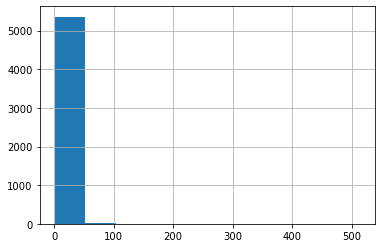

In [14]:
prot_fam_counts = df['Protein families'].value_counts()
prot_fam_counts.hist();
print(prot_fam_counts.describe().round(1))
print("top most common:")
# print(prot_fam_counts.head())
prot_fam_counts

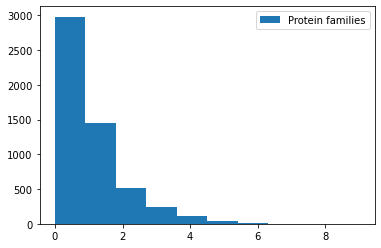

In [24]:
prot_fam_counts.apply(np.log2).hist(grid=False,legend=True);

### Counts per treefam family
* https://en.wikipedia.org/wiki/TreeFam
* 	http://www.treefam.org

TreeFam
count    8819.0
mean        2.3
std         3.1
min         1.0
25%         1.0
50%         1.0
75%         2.0
max        51.0
Name: gene_tree_stable_id, dtype: float64
top most common:
TF351634    51
TF332299    51
TF313103    46
TF315605    44
TF314166    44
Name: gene_tree_stable_id, dtype: int64


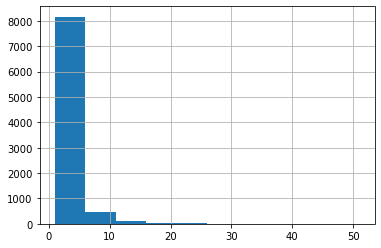

In [16]:
print("TreeFam")
treefam_counts = df['gene_tree_stable_id'].value_counts()
treefam_counts.hist();
print(treefam_counts.describe().round(2))
print("top most common:")
print(treefam_counts.head())

### get variation of mir target in a TreeFan family
* STD? (is nan for cases of sample 1)
* gini impurity? 
* % of times where value is not equal to mode?

In [17]:
df.groupby(['gene_tree_stable_id'])["bool_mir_target"].std()

gene_tree_stable_id
TF101001    0.516398
TF101002    0.000000
TF101004    0.000000
TF101005    0.000000
TF101006    0.000000
              ...   
TF354334         NaN
TF354335         NaN
TF354340    0.000000
TF354343    0.000000
TF354344         NaN
Name: bool_mir_target, Length: 8819, dtype: float64

In [18]:
df.groupby(['gene_tree_stable_id'])["bool_mir_target"].std().describe()

count    3826.000000
mean        0.179684
std         0.269472
min         0.000000
25%         0.000000
50%         0.000000
75%         0.487950
max         0.707107
Name: bool_mir_target, dtype: float64

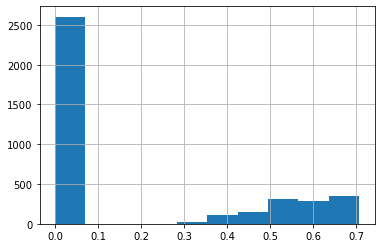

In [19]:
df.groupby(['gene_tree_stable_id'])["bool_mir_target"].std().hist();

In [20]:
print("% of cases where all treeFam family members are identically regulated/not regulated by miRNA:")
100*(df.groupby(['gene_tree_stable_id'])["bool_mir_target"].std()==0).mean().round(3)

% of cases where all treeFam family members are identically regulated/not regulated by miRNA:


29.5

In [21]:
## not corrected yet ? 
df_temp = df.loc[df.groupby(['gene_tree_stable_id'])["bool_mir_target"].transform("size")>1].copy()
df_temp["sd"] = df_temp.groupby(['gene_tree_stable_id'])["bool_mir_target"].transform("std")
df_temp["sd"] = (df_temp["sd"]<=0).astype(int)
# df_temp["sd"].describe().round(3)

df_temp["sd"].value_counts(normalize=True)

1    0.532161
0    0.467839
Name: sd, dtype: float64

### get variation of mir target in a uniprot Protein family

#### NOTE: This notebook version didn't correct for their being multiple proteins per family, when calcing the numbers - don't use the % from here as ground truth, unless fixed!!!

In [22]:
df.groupby(['Protein families'])["bool_mir_target"].std()

Protein families
 17-beta-hsd 3 subfamily                                                     0.000000
 2,4-dienoyl-coa reductase subfamily                                         0.707107
 3-hydroxyisobutyrate dehydrogenase subfamily                                     NaN
 5-hydroxytryptamine receptor (tc 1.a.9.2) subfamily, htr3a sub-subfamily         NaN
 5-hydroxytryptamine receptor (tc 1.a.9.2) subfamily, htr3b sub-subfamily         NaN
                                                                               ...   
zwilch family                                                                     NaN
zxd family                                                                   0.000000
zyg-11 family                                                                0.000000
zygin family                                                                 0.707107
zyxin/ajuba family                                                           0.000000
Name: bool_mir_target, Length: 5377, 

In [23]:
df.groupby(['Protein families'])["bool_mir_target"].std().describe()

count    2397.000000
mean        0.242140
std         0.278548
min         0.000000
25%         0.000000
50%         0.000000
75%         0.516398
max         0.707107
Name: bool_mir_target, dtype: float64

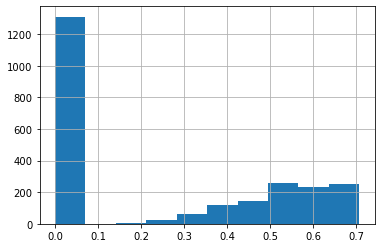

In [24]:
df.groupby(['Protein families'])["bool_mir_target"].std().hist();

In [25]:
print("% of cases where all Protein families members are identically regulated/not regulated by miRNA:")
100*(df.groupby(['Protein families'])["bool_mir_target"].std()==0).mean().round(3) ##INCORRECT - fix! (Rea number is higher)

% of cases where all Protein families members are identically regulated/not regulated by miRNA:


24.4

In [26]:
## not corrected yet ? 
df_temp = df.loc[df.groupby(['Protein families'])["bool_mir_target"].transform("size")>1].copy()
df_temp["sd"] = df_temp.groupby(['Protein families'])["bool_mir_target"].transform("std")
df_temp["sd"] = (df_temp["sd"]<=0).astype(int)
# df_temp["sd"].describe().round(3)

df_temp["sd"].value_counts(normalize=True)

0    0.711308
1    0.288692
Name: sd, dtype: float64

### More orthology:
* Phylogenomic databases linked with uniprot - downloaded for human + reviewed + merge with our data and chekc # families

`Phylogenomic_SWP_Human.tsv.gz`

In [27]:
df_phylo = pd.read_csv("Phylogenomic_SWP_Human.tsv.gz",sep="\t").drop_duplicates().set_index("Entry")
print(df_phylo.shape)
print(df_phylo.nunique())
df_phylo

(20376, 19)
Entry name                      20376
Status                              1
Protein names                   20376
Gene names                      20181
Organism                            1
Length                           2157
Gene names  (primary )          20136
Features                        18239
Cross-reference (eggNOG)         9562
Cross-reference (GeneTree)      14895
Cross-reference (HOGENOM)       12326
Cross-reference (InParanoid)    19264
Cross-reference (OMA)           17862
Cross-reference (OrthoDB)        9227
Cross-reference (TreeFam)        9072
Mass                            18527
Keywords                        14973
Protein existence                   5
Protein families                 5077
dtype: int64


,Entry name,Status,Protein names,Gene names,Organism,Length,Gene names (primary ),Features,Cross-reference (eggNOG),Cross-reference (GeneTree),Cross-reference (HOGENOM),Cross-reference (InParanoid),Cross-reference (OMA),Cross-reference (OrthoDB),Cross-reference (TreeFam),Mass,Keywords,Protein existence,Protein families
Entry,,,,,,,,,,,,,,,,,,,
P51451,BLK_HUMAN,reviewed,Tyrosine-protein kinase Blk (EC 2.7.10.2) (B l...,BLK,Homo sapiens (Human),505,BLK,Active site (1); Binding site (1); Chain (1); ...,KOG0197;,ENSGT00940000159864;,NaN,P51451;,FYTATEQ;,539311at2759;,TF351634;,"57,706",ATP-binding;Cell membrane;Diabetes mellitus;Ki...,Evidence at protein level,"Protein kinase superfamily, Tyr protein kinase..."
A6H8Y1,BDP1_HUMAN,reviewed,Transcription factor TFIIIB component B'' homo...,BDP1 KIAA1241 KIAA1689 TFNR,Homo sapiens (Human),2624,BDP1,Alternative sequence (16); Chain (1); Coiled c...,KOG2009;,ENSGT00390000012762;,CLU_000736_0_0_1;,NaN,MKESVIQ;,156866at2759;,TF328878;,"293,885",3D-structure;Activator;Alternative splicing;Co...,Evidence at protein level,NaN
O60885,BRD4_HUMAN,reviewed,Bromodomain-containing protein 4 (Protein HUNK1),BRD4 HUNK1,Homo sapiens (Human),1362,BRD4,Alternative sequence (3); Beta strand (6); Cha...,KOG1474;,ENSGT00940000154549;,CLU_001499_0_3_1;,O60885;,SQLMPEK;,619848at2759;,TF317345;,"152,219",3D-structure;Acetylation;Alternative splicing;...,Evidence at protein level,NaN
Q9Y3X0,CCDC9_HUMAN,reviewed,Coiled-coil domain-containing protein 9,CCDC9,Homo sapiens (Human),531,CCDC9,Chain (1); Coiled coil (1); Compositional bias...,ENOG502QUM9;,ENSGT00530000063950;,CLU_037213_1_0_1;,Q9Y3X0;,NaN,602532at2759;,TF336272;,"59,703",Coiled coil;Methylation;Phosphoprotein;Referen...,Evidence at protein level,NaN
P22223,CADH3_HUMAN,reviewed,Cadherin-3 (Placental cadherin) (P-cadherin),CDH3 CDHP,Homo sapiens (Human),829,CDH3,Alternative sequence (1); Beta strand (20); Ch...,KOG3594;,ENSGT00940000154848;,CLU_005284_2_0_1;,P22223;,EAQNQHT;,182239at2759;,TF316817;,"91,418",3D-structure;Alternative splicing;Calcium;Cell...,Evidence at protein level,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O00471,EXOC5_HUMAN,reviewed,Exocyst complex component 5 (Exocyst complex c...,EXOC5 SEC10 SEC10L1,Homo sapiens (Human),708,EXOC5,Chain (1); Coiled coil (1); Initiator methioni...,KOG3745;,ENSGT00390000012837;,CLU_020771_1_0_1;,O00471;,PLCKHHY;,225235at2759;,TF314966;,"81,853",Acetylation;Coiled coil;Cytoplasm;Exocytosis;P...,Evidence at protein level,SEC10 family
Q5JX71,F209A_HUMAN,reviewed,Protein FAM209A,FAM209A C20orf106,Homo sapiens (Human),171,FAM209A,Chain (1); Coiled coil (1); Natural variant (5...,ENOG502SQY6;,ENSGT00390000005057;,CLU_1585866_0_0_1;,Q5JX71;,TICEIWG;,1258912at2759;,TF338191;,"19,603",Coiled coil;Differentiation;Membrane;Nucleus;R...,Evidence at protein level,FAM209 family
P15036,ETS2_HUMAN,reviewed,Protein C-ets-2,ETS2,Homo sapiens (Human),469,ETS2,Beta strand (6); Chain (1); DNA binding (1); D...,KOG3806;,ENSGT00940000160202;,CLU_031197_1_1_1;,P15036;,RSWNSQS;,526256at2759;,TF316214;,"53,001",3D-structure;DNA-binding;Nucleus;Phosphoprotei...,Evidence at protein level,ETS family


In [28]:
# df_phylo["Cross-reference (eggNOG)"].str.split(";").str.len().describe()

* Computationally predicted miR targets from targetscan:

In [29]:
df_vert_ts = pd.read_csv("targetScanSummaryCounts/vert_Predicted_Targets_Info.default_predictions.tsv",sep="\t")
# df_vert_ts
targetScanGeneList = df_vert_ts["Gene Symbol"].unique() # note, includes all vert species 

print(len(targetScanGeneList))
targetScanGeneList[0:3]

13759


array(['A1BG', 'A1CF', 'A2M'], dtype=object)

## Examples

* Filter for cases with a known protein family, with more than 2 member (and drop rows missing protein family)

In [30]:
df["TS_mirTarget"] = df['Gene names  (primary )'].isin(targetScanGeneList).astype(int) ## is gene in target scan genes - warning, free text, noisy
df["std"] = df.groupby(['Protein families'])["bool_mir_target"].transform("std").round(3)
df["mean"] = df.groupby(['Protein families'])["bool_mir_target"].transform("mean").round(3)

df["std_ts"] = df.groupby(['Protein families'])["TS_mirTarget"].transform("std").round(3)
df["mean_ts"] = df.groupby(['Protein families'])["TS_mirTarget"].transform("mean").round(3)

df["fam_count"] = df.groupby(['Protein families'])["bool_mir_target"].transform("size")
df["has_tfam_id"] = ~df['gene_tree_stable_id'].isna()
print(df.shape[0])
df[["std","mean","fam_count","std_ts","mean_ts",'Protein families',"mir_target","TS_mirTarget","has_tfam_id"]].describe(include="all").round(2)

22386


,std,mean,fam_count,std_ts,mean_ts,Protein families,mir_target,TS_mirTarget,has_tfam_id
count,14105.00,17085.00,17085.00,14105.00,17085.00,17085,22386.00,22386.00,22386
unique,NaN,NaN,NaN,NaN,NaN,5377,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,krueppel c2h2-type zinc-finger protein family,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,513,NaN,NaN,20291
mean,0.31,0.78,54.80,0.34,0.68,NaN,0.35,0.68,NaN
std,0.22,0.27,134.02,0.22,0.32,NaN,0.84,0.47,NaN
min,0.00,0.00,1.00,0.00,0.00,NaN,-1.00,0.00,NaN
25%,0.00,0.67,2.00,0.00,0.50,NaN,0.00,0.00,NaN
50%,0.37,0.86,6.00,0.42,0.76,NaN,1.00,1.00,NaN
75%,0.49,1.00,23.00,0.50,1.00,NaN,1.00,1.00,NaN


In [31]:
df2 = df.loc[(df["fam_count"]>2) & (df["has_tfam_id"])] # ORIG
# df2 = df.loc[df["fam_count"]>11]## ALT

df2 = df2.filter([ 
        'Protein families','Protein names',  'mir_target', 'bool_mir_target', 'std',
       'fam_count', 'mean', "std_ts","mean_ts", "TS_mirTarget",  'gene_tree_stable_id',
    'Length', 'Keywords',#'Gene names',
                'Gene names  (primary )', "has_tfam_id",  #  
    'Taxonomic lineage (SPECIES)','Features', 'Protein existence', 'Gene ontology (GO)', 'Sequence',
       'Tissue specificity','Entry name'],axis=1)
print((df2["std"]==0).mean(),"% rows have same regulation") ## 33% with min 2, 25% with min 3
df2 = df2.dropna(thresh=280,axis=1).drop_duplicates()
## keep 1-2 examples per family
df2 = df2.drop_duplicates(subset=['Protein families',"bool_mir_target","has_tfam_id","TS_mirTarget"]).sort_values(["Protein families","fam_count"],ascending=False)
df2

0.21381961204970054 % rows have same regulation


,Protein families,Protein names,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,...,Keywords,Gene names (primary ),has_tfam_id,Taxonomic lineage (SPECIES),Features,Protein existence,Gene ontology (GO),Sequence,Tissue specificity,Entry name
Entry,,,,,,,,,,,,,,,,,,,,,
A6NIX2,zyxin/ajuba family,Wilms tumor protein 1-interacting protein (WT1...,1.0,1,0.0,6.0,1.00,0.408,0.833,1,...,Cell junction. Cilium biogenesis/degradation. ...,WTIP,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Domain (3...,Evidence at protein level,adherens junction [GO:0005912]. nucleus [GO:0...,MQRSRAGADEAALLLAGLALRELEPGCGSPGRGRRGPRPGPGDEAA...,NaN,WTIP_HUMAN
Q15654,zyxin/ajuba family,Thyroid receptor-interacting protein 6 (TR-int...,1.0,1,0.0,6.0,1.00,0.408,0.833,0,...,3D-structure. Alternative splicing. Cell adhes...,TRIP6,True,Homo sapiens (Human),Alternative sequence (4). Beta strand (9). C...,Evidence at protein level,cytoplasm [GO:0005737]. cytoskeleton [GO:0005...,MSGPTWLPPKQPEPARAPQGRAIPRGTPGPPPAHGAALQPHPRVNF...,TISSUE SPECIFICITY: Abundantly expressed in ki...,TRIP6_HUMAN
Q7Z7L7,zyg-11 family,Protein zer-1 homolog (Hzyg) (Zyg-11 homolog B...,1.0,1,0.0,3.0,1.00,0.000,1.000,1,...,Acetylation. Leucine-rich repeat. Reference pr...,ZER1,True,Homo sapiens (Human),Chain (1). Initiator methionine (1). Modifie...,Evidence at protein level,Cul2-RING ubiquitin ligase complex [GO:0031462...,MASDTPESLMALCTDFCLRNLDGTLGYLLDKETLRLHPDIFLPSEI...,"TISSUE SPECIFICITY: Expressed in testis, sperm...",ZER1_HUMAN
P98169,zxd family,Zinc finger X-linked protein ZXDB,1.0,1,0.0,3.0,1.00,0.000,1.000,1,...,Activator. Metal-binding. Nucleus. Reference p...,ZXDB,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Natural v...,Evidence at protein level,nucleus [GO:0005634]. metal ion binding [GO:0...,MEIPKLLPARGTLQGGGGGGIPAGGGRVHRGPDSPAGQVPTRRLLL...,"TISSUE SPECIFICITY: May be expressed in brain,...",ZXDB_HUMAN
Q05996,zp domain,Zona pellucida sperm-binding protein 2 (Zona p...,-1.0,0,0.5,4.0,0.25,0.000,0.000,0,...,Alternative splicing. Cell membrane. Cleavage ...,ZP2,True,Homo sapiens (Human),Alternative sequence (1). Chain (2). Composi...,Evidence at protein level,collagen-containing extracellular matrix [GO:0...,MACRQRGGSWSPSGWFNAGWSTYRSISLFFALVTSGNSIDVSQLVN...,TISSUE SPECIFICITY: Expressed in occytes(at pr...,ZP2_HUMAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O75608,ab hydrolase 2 family,Acyl-protein thioesterase 1 (APT-1) (hAPT1) (E...,1.0,1,0.0,3.0,1.00,0.000,1.000,1,...,3D-structure. Acetylation. Alternative splicin...,LYPLA1,True,Homo sapiens (Human),Active site (3). Alternative sequence (1). B...,Evidence at protein level,cytoplasm [GO:0005737]. cytosol [GO:0005829]....,MCGNNMSTPLPAIVPAARKATAAVIFLHGLGDTGHGWAEAFAGIRS...,TISSUE SPECIFICITY: Platelets. {ECO:0000269|Pu...,LYPA1_HUMAN
Q13114,a subfamily,TNF receptor-associated factor 3 (EC 2.3.2.27)...,1.0,1,0.0,4.0,1.00,0.500,0.750,1,...,3D-structure. Alternative splicing. Apoptosis....,TRAF3,True,Homo sapiens (Human),Alternative sequence (1). Beta strand (15). ...,Evidence at protein level,CD40 receptor complex [GO:0035631]. cytoplasm...,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,NaN,TRAF3_HUMAN
Q12933,a subfamily,TNF receptor-associated factor 2 (EC 2.3.2.27)...,1.0,1,0.0,4.0,1.00,0.500,0.750,0,...,3D-structure. Acetylation. Alternative splicin...,TRAF2,True,Homo sapiens (Human),Alternative sequence (3). Beta strand (14). ...,Evidence at protein level,CD40 receptor complex [GO:0035631]. cell cort...,MAAASVTPPGSLELLQPGFSKTLLGTKLEAKYLCSACRNVLRRPFQ...,NaN,TRAF2_HUMAN


Intermediate filament family: 
* "Phakinin" - has external evidence for being a mir target ; https://www.genecards.org/cgi-bin/carddisp.pl?gene=BFSP2 , but in our data, "weak evidence" 

In [32]:
df2.loc[df2.fam_count<100].head(15)

,Protein families,Protein names,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,...,Keywords,Gene names (primary ),has_tfam_id,Taxonomic lineage (SPECIES),Features,Protein existence,Gene ontology (GO),Sequence,Tissue specificity,Entry name
Entry,,,,,,,,,,,,,,,,,,,,,
A6NIX2,zyxin/ajuba family,Wilms tumor protein 1-interacting protein (WT1...,1.0,1,0.000,6.0,1.000,0.408,0.833,1,...,Cell junction. Cilium biogenesis/degradation. ...,WTIP,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Domain (3...,Evidence at protein level,adherens junction [GO:0005912]. nucleus [GO:0...,MQRSRAGADEAALLLAGLALRELEPGCGSPGRGRRGPRPGPGDEAA...,NaN,WTIP_HUMAN
Q15654,zyxin/ajuba family,Thyroid receptor-interacting protein 6 (TR-int...,1.0,1,0.000,6.0,1.000,0.408,0.833,0,...,3D-structure. Alternative splicing. Cell adhes...,TRIP6,True,Homo sapiens (Human),Alternative sequence (4). Beta strand (9). C...,Evidence at protein level,cytoplasm [GO:0005737]. cytoskeleton [GO:0005...,MSGPTWLPPKQPEPARAPQGRAIPRGTPGPPPAHGAALQPHPRVNF...,TISSUE SPECIFICITY: Abundantly expressed in ki...,TRIP6_HUMAN
Q7Z7L7,zyg-11 family,Protein zer-1 homolog (Hzyg) (Zyg-11 homolog B...,1.0,1,0.000,3.0,1.000,0.000,1.000,1,...,Acetylation. Leucine-rich repeat. Reference pr...,ZER1,True,Homo sapiens (Human),Chain (1). Initiator methionine (1). Modifie...,Evidence at protein level,Cul2-RING ubiquitin ligase complex [GO:0031462...,MASDTPESLMALCTDFCLRNLDGTLGYLLDKETLRLHPDIFLPSEI...,"TISSUE SPECIFICITY: Expressed in testis, sperm...",ZER1_HUMAN
P98169,zxd family,Zinc finger X-linked protein ZXDB,1.0,1,0.000,3.0,1.000,0.000,1.000,1,...,Activator. Metal-binding. Nucleus. Reference p...,ZXDB,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Natural v...,Evidence at protein level,nucleus [GO:0005634]. metal ion binding [GO:0...,MEIPKLLPARGTLQGGGGGGIPAGGGRVHRGPDSPAGQVPTRRLLL...,"TISSUE SPECIFICITY: May be expressed in brain,...",ZXDB_HUMAN
Q05996,zp domain,Zona pellucida sperm-binding protein 2 (Zona p...,-1.0,0,0.500,4.0,0.250,0.000,0.000,0,...,Alternative splicing. Cell membrane. Cleavage ...,ZP2,True,Homo sapiens (Human),Alternative sequence (1). Chain (2). Composi...,Evidence at protein level,collagen-containing extracellular matrix [GO:0...,MACRQRGGSWSPSGWFNAGWSTYRSISLFFALVTSGNSIDVSQLVN...,TISSUE SPECIFICITY: Expressed in occytes(at pr...,ZP2_HUMAN
P21754,zp domain,Zona pellucida sperm-binding protein 3 (Sperm ...,0.0,1,0.500,4.0,0.250,0.000,0.000,0,...,Alternative splicing. Cell membrane. Cleavage ...,ZP3,True,Homo sapiens (Human),Alternative sequence (3). Chain (2). Composi...,Evidence at protein level,collagen-containing extracellular matrix [GO:0...,MELSYRLFICLLLWGSTELCYPQPLWLLQGGASHPETSVQPVLVEC...,TISSUE SPECIFICITY: Expressed in oocytes (at p...,ZP3_HUMAN
Q9BRY0,zip transporter (tc 2.a.5) family,Zinc transporter ZIP3 (Solute carrier family 3...,0.0,1,0.376,13.0,0.846,0.376,0.846,0,...,Alternative splicing. Ion transport. Membrane....,SLC39A3,True,Homo sapiens (Human),Alternative sequence (2). Chain (1). Modifie...,Evidence at protein level,integral component of membrane [GO:0016021]. ...,MVKLLVAKILCMVGVFFFMLLGSLLPVKIIETDFEKAHRSKKILSL...,NaN,S39A3_HUMAN
Q6P5W5,zip transporter (tc 2.a.5) family,Zinc transporter ZIP4 (Solute carrier family 3...,-1.0,0,0.376,13.0,0.846,0.376,0.846,1,...,Alternative splicing. Cell membrane. Disease v...,SLC39A4,True,Homo sapiens (Human),Alternative sequence (2). Chain (1). Composi...,Evidence at protein level,apical plasma membrane [GO:0016324]. cytoplas...,MASLVSLELGLLLAVLVVTATASPPAGLLSLLTSGQGALDQEALGG...,TISSUE SPECIFICITY: Highly expressed in kidney...,S39A4_HUMAN
Q9ULF5,zip transporter (tc 2.a.5) family,Zinc transporter ZIP10 (Solute carrier family ...,1.0,1,0.376,13.0,0.846,0.376,0.846,1,...,Alternative splicing. Glycoprotein. Ion transp...,SLC39A10,True,Homo sapiens (Human),Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,integral component of plasma membrane [GO:0005...,MKVHMHTKFC

* Examples of "odd ones out" = a single gene having different regulation from it's family
* Take small families for easier analysis (and to avoid cases of "1 out of 200")

In [33]:
df2.loc[(df2.fam_count.between(3,10)) & (df2[["std","std_ts"]].min(axis=1)>0)].head(15)

,Protein families,Protein names,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,...,Keywords,Gene names (primary ),has_tfam_id,Taxonomic lineage (SPECIES),Features,Protein existence,Gene ontology (GO),Sequence,Tissue specificity,Entry name
Entry,,,,,,,,,,,,,,,,,,,,,
P07327,zinc-containing alcohol dehydrogenase family,Alcohol dehydrogenase 1A (EC 1.1.1.1) (Alcohol...,0.0,1,0.500,4.0,0.750,0.577,0.500,0,...,3D-structure. Acetylation. Cytoplasm. Direct p...,ADH1A,True,Homo sapiens (Human),Beta strand (21). Binding site (4). Chain (1...,Evidence at protein level,cytosol [GO:0005829]. nucleoplasm [GO:0005654...,MSTAGKVIKCKAAVLWELKKPFSIEEVEVAPPKAHEVRIKMVAVGI...,NaN,ADH1A_HUMAN
P00325,zinc-containing alcohol dehydrogenase family,All-trans-retinol dehydrogenase [NAD(+)] ADH1B...,1.0,1,0.500,4.0,0.750,0.577,0.500,1,...,3D-structure. Acetylation. Alternative splicin...,ADH1B,True,Homo sapiens (Human),Alternative sequence (1). Beta strand (22). ...,Evidence at protein level,cytosol [GO:0005829]. nucleoplasm [GO:0005654...,MSTAGKVIKCKAAVLWEVKKPFSIEDVEVAPPKAYEVRIKMVAVGI...,NaN,ADH1B_HUMAN
Q96GY0,zc2hc1 family,Zinc finger C2HC domain-containing protein 1A,0.0,1,0.577,3.0,0.667,0.577,0.667,1,...,Metal-binding. Phosphoprotein. Reference prote...,ZC2HC1A,True,Homo sapiens (Human),Chain (1). Compositional bias (3). Modified ...,Evidence at protein level,metal ion binding [GO:0046872],MEGLEENGGVVQVGELLPCKICGRTFFPVALKKHGPICQKTATKKR...,NaN,ZC21A_HUMAN
Q96EC8,yip1 family,Protein YIPF6 (YIP1 family member 6),1.0,1,0.378,7.0,0.857,0.378,0.857,1,...,Acetylation. Alternative splicing. Golgi appar...,YIPF6,True,Homo sapiens (Human),Alternative sequence (1). Chain (1). Initiat...,Evidence at protein level,cis-Golgi network [GO:0005801]. COPII-coated ...,MAEAEESPGDPGTASPRPLFAGLSDISISQDIPVEGEITIPMRSRI...,NaN,YIPF6_HUMAN
Q9Y548,yip1 family,Protein YIPF1 (YIP1 family member 1),0.0,1,0.378,7.0,0.857,0.378,0.857,0,...,Alternative splicing. Endosome. Glycoprotein. ...,YIPF1,True,Homo sapiens (Human),Alternative sequence (1). Chain (1). Composi...,Evidence at protein level,Golgi apparatus [GO:0005794]. Golgi medial ci...,MAAVDDLQFEEFGNAATSLTANPDATTVNIEDPGETPKHQPGSPRG...,NaN,YIPF1_HUMAN
Q8N8F6,yip1 family,Protein YIPF7 (Five-pass transmembrane protein...,-1.0,0,0.378,7.0,0.857,0.378,0.857,1,...,Alternative splicing. Endoplasmic reticulum. G...,YIPF7,True,Homo sapiens (Human),Alternative sequence (5). Chain (1). Natural...,Evidence at protein level,endoplasmic reticulum membrane [GO:0005789]. ...,MDLLKISHTKLHLLEDLSIKNKQRMSNLAQFDSDFYQSNFTIDNQE...,NaN,YIPF7_HUMAN
Q13426,xrcc4-xlf,DNA repair protein XRCC4 (hXRCC4) (X-ray repai...,-1.0,0,0.577,3.0,0.333,0.577,0.333,0,...,3D-structure. Alternative splicing. Chromosome...,XRCC4,True,Homo sapiens (Human),Alternative sequence (2). Beta strand (7). C...,Evidence at protein level,cytoplasm [GO:0005737]. cytosol [GO:0005829]....,MERKISRIHLVSEPSITHFLQVSWEKTLESGFVITLTDGHSAWTGT...,TISSUE SPECIFICITY: Widely expressed. {ECO:000...,XRCC4_HUMAN
Q9BUH6,xrcc4-xlf,Protein PAXX (Paralog of XRCC4 and XLF) (XRCC4...,1.0,1,0.577,3.0,0.333,0.577,0.333,0,...,3D-structure. Alternative splicing. Chromosome...,PAXX,True,Homo sapiens (Human),Alternative sequence (2). Beta strand (10). ...,Evidence at protein level,nonhomologous end joining complex [GO:0070419]...,MDPLSPPLCTLPPGPEPPRFVCYCEGEESGEGDRGGFNLYVTDAAE...,NaN,PAXX_HUMAN
Q9H9Q4,xrcc4-xlf,Non-homologous end-joining factor 1 (Protein c...,-1.0,0,0.577,3.0,0.333,0.577,0.333,1,...,3D-structure. Alternative splicing. Chromosoma...,NHEJ1,True,Homo sapiens (Human),Alternative sequence (1). Beta strand (7). C...,Evidence at protein level,DNA ligase IV complex [GO:0032807]. fibrillar...,MEELEQGLLMQPWAWLQLAENSLLAKVFITKQGYALLVSDLQQVWH...,TISSUE SPECIFICITY: Ubiquitously expressed. {E...,NHEJ1_HUMAN


In [34]:
## exceptions that are regulated ,while most are not
df2.loc[(df2.fam_count.between(3,30)) & (df2[["mean","mean_ts"]].min(axis=1)<0.4) & (df2[["std","std_ts"]].min(axis=1)>0)].sort_values(["mean","mean_ts"],ascending=True).head(15)

,Protein families,Protein names,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,...,Keywords,Gene names (primary ),has_tfam_id,Taxonomic lineage (SPECIES),Features,Protein existence,Gene ontology (GO),Sequence,Tissue specificity,Entry name
Entry,,,,,,,,,,,,,,,,,,,,,
A6NGK3,gage family,G antigen 10 (GAGE-10),-1.0,0,0.236,18.0,0.056,0.236,0.056,0,...,Reference proteome,GAGE10,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Region (1),Evidence at protein level,NaN,MSWRGRSTYRSRPRLYVEPPEMIGPMLPEQFSDEVEPATPEEGEPA...,NaN,GAG10_HUMAN
O60829,gage family,P antigen family member 4 (PAGE-4) (G antigen ...,-1.0,0,0.236,18.0,0.056,0.236,0.056,1,...,3D-structure. Activator. Cytoplasm. DNA-bindin...,PAGE4,True,Homo sapiens (Human),Chain (1). Compositional bias (1). Modified ...,Evidence at protein level,cytoplasm [GO:0005737]. mitochondrion [GO:000...,MSARVRSRSRGRGDGQEAPDVVAFVAPGESQQEEPPTDNQDIEPGQ...,TISSUE SPECIFICITY: Expressed at basal lvels i...,PAGE4_HUMAN
P49450,histone h3 family,Histone H3-like centromeric protein A (Centrom...,1.0,1,0.354,8.0,0.125,0.354,0.125,1,...,3D-structure. ADP-ribosylation. Alternative sp...,CENPA,True,Homo sapiens (Human),Alternative sequence (1). Beta strand (2). C...,Evidence at protein level,"chromosome, centromeric region [GO:0000775]. ...",MGPRRRSRKPEAPRRRSPSPTPTPGPSRRGPSLGASSHQHSRRRQG...,NaN,CENPA_HUMAN
Q5TEC6,histone h3 family,Histone HIST2H3PS2,-1.0,0,0.354,8.0,0.125,0.354,0.125,0,...,3D-structure. ADP-ribosylation. Acetylation. C...,H3-2,True,Homo sapiens (Human),Chain (1). Initiator methionine (1). Modifie...,Evidence at protein level,nucleosome [GO:0000786]. nucleus [GO:0005634]...,MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGT...,NaN,H3PS2_HUMAN
Q9NWW9,h-rev107 family,Phospholipase A and acyltransferase 2 (EC 2.3....,-1.0,0,0.408,6.0,0.167,0.408,0.167,0,...,3D-structure. Acyltransferase. Cytoplasm. Hydr...,PLAAT2,True,Homo sapiens (Human),Active site (3). Chain (1). Domain (1). Mut...,Evidence at protein level,cytoplasm [GO:0005737]. cytosol [GO:0005829]....,MALARPRPRLGDLIEISRFGYAHWAIYVGDGYVVHLAPASEIAGAG...,"TISSUE SPECIFICITY: Expressed in liver, kidney...",PLAT2_HUMAN
O95237,h-rev107 family,Lecithin retinol acyltransferase (EC 2.3.1.135...,1.0,1,0.408,6.0,0.167,0.408,0.167,1,...,Acyltransferase. Cytoplasm. Disease variant. E...,LRAT,True,Homo sapiens (Human),Active site (3). Chain (1). Domain (1). Mut...,Evidence at protein level,endoplasmic reticulum [GO:0005783]. endoplasm...,MKNPMLEVVSLLLEKLLLISNFTLFSSGAAGEDKGRNSFYETSSFH...,TISSUE SPECIFICITY: Hepatic stellate cells and...,LRAT_HUMAN
P01242,somatotropin/prolactin family,Growth hormone variant (GH-V) (Growth hormone ...,-1.0,0,0.408,6.0,0.167,0.516,0.667,1,...,Alternative splicing. Direct protein sequencin...,GH2,True,Homo sapiens (Human),Alternative sequence (3). Chain (1). Disulfi...,Evidence at protein level,endosome lumen [GO:0031904]. extracellular re...,MAAGSRTSLLLAFGLLCLSWLQEGSAFPTIPLSRLFDNAMLRARRL...,TISSUE SPECIFICITY: Expressed in the placenta.,SOM2_HUMAN
P01241,somatotropin/prolactin family,Somatotropin (Growth hormone) (GH) (GH-N) (Gro...,-1.0,0,0.408,6.0,0.167,0.516,0.667,0,...,3D-structure. Alternative splicing. Direct pro...,GH1,True,Homo sapiens (Human),Alternative sequence (4). Beta strand (1). C...,Evidence at protein level,endosome lumen [GO:0031904]. extracellular re...,MATGSRTSLLLAFGLLCLPWLQEGSAFPTIPLSRLFDNAMLRAHRL...,NaN,SOMA_HUMAN
Q14406,somatotropin/prolactin family,Chorionic somatomammotropin hormone-like 1 (Ch...,0.0,1,0.408,6.0,0.167,0.516,0.667,1,...,Alternative splicing. Disulfide bond. Hormone....,CSHL1,True,Homo sapiens (Human),Alternative sequence (3). Chain (1). Disulfi...,Evidence at transcript level,extracellular space [GO:0005615]. growth fact...,MAAGSRTSLLLAFALLCLPWLQEAGAVQTVPLSRLFKEAMLQAHRA...,NaN,CSHL_HUMAN


##### Families where are **all share regulation** 
* (filter by both sources, as optional ranking)

In [35]:
df2.loc[df2[["std","std_ts"]].min(axis=1)==0].drop_duplicates(["Protein families"]).sort_values("fam_count",ascending=False).iloc[:,0:11]

,Protein families,Protein names,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,gene_tree_stable_id
Entry,,,,,,,,,,,
P51531,snf2/rad54 helicase family,Probable global transcription activator SNF2L2...,1.0,1,0.000,25.0,1.000,0.200,0.960,1,TF300785
Q8IWK6,adhesion g-protein coupled receptor (adgr) su...,Adhesion G protein-coupled receptor A3 (G-prot...,-1.0,0,0.436,25.0,0.760,0.000,0.000,0,TF331206
Q9H7B4,class v-like sam-binding methyltransferase,Histone-lysine N-methyltransferase SMYD3 (EC 2...,1.0,1,0.000,23.0,1.000,0.470,0.696,0,TF106487
Q13705,tkl ser/thr protein kinase,Activin receptor type-2B (EC 2.7.11.30) (Activ...,1.0,1,0.301,21.0,0.905,0.000,1.000,1,TF352876
Q9BYW2,histone-lysine methyltransferase,Histone-lysine N-methyltransferase SETD2 (EC 2...,1.0,1,0.000,20.0,1.000,0.444,0.750,1,TF106477
...,...,...,...,...,...,...,...,...,...,...,...
Q00403,tfiib family,Transcription initiation factor IIB (EC 2.3.1....,1.0,1,0.000,3.0,1.000,0.577,0.667,1,TF105953
Q7Z7L7,zyg-11 family,Protein zer-1 homolog (Hzyg) (Zyg-11 homolog B...,1.0,1,0.000,3.0,1.000,0.000,1.000,1,TF313007
Q9HC38,glyoxalase i family,Glyoxalase domain-containing protein 4,1.0,1,0.577,3.0,0.667,0.000,1.000,1,TF105801


* An example of a gene from a family of orthologs that is an exception in not being regulated is: Zinc finger C2HC domain-containing protein 1A, of the ZC2HC1 family of metal binding proteins (there are 3 members of the family). 

In [36]:
df.loc[df["Protein families"].str.contains("ZC2HC1 family",case=False,na=False)]

,Entry name,Protein names,Length,Keywords,Gene names (primary ),Mass,Features,Protein existence,Nucleotide binding,Gene ontology (GO),...,total_nan,bool_mir_target,gene_tree_stable_id,TS_mirTarget,std,mean,std_ts,mean_ts,fam_count,has_tfam_id
Entry,,,,,,,,,,,,,,,,,,,,,
Q96GY0,ZC21A_HUMAN,Zinc finger C2HC domain-containing protein 1A,325,Metal-binding. Phosphoprotein. Reference prote...,ZC2HC1A,"35,092",Chain (1). Compositional bias (3). Modified ...,Evidence at protein level,NaN,metal ion binding [GO:0046872],...,20,1,TF319585,1,0.577,0.667,0.577,0.667,3.0,True
Q5TFG8,ZC21B_HUMAN,Zinc finger C2HC domain-containing protein 1B,222,Metal-binding. Reference proteome. Zinc. Zinc-...,ZC2HC1B,"24,665",Chain (1). Compositional bias (1). Natural v...,Evidence at protein level,NaN,metal ion binding [GO:0046872],...,20,0,NaN,0,0.577,0.667,0.577,0.667,3.0,False
Q53FD0,ZC21C_HUMAN,Zinc finger C2HC domain-containing protein 1C,456,Alternative splicing. Coiled coil. Metal-bindi...,ZC2HC1C,"51,658",Alternative sequence (1). Chain (1). Coiled ...,Evidence at protein level,NaN,metal ion binding [GO:0046872],...,20,1,TF319585,1,0.577,0.667,0.577,0.667,3.0,True


In [37]:
df.loc[df["Protein families"].str.contains("PMG family",case=False,na=False)]

,Entry name,Protein names,Length,Keywords,Gene names (primary ),Mass,Features,Protein existence,Nucleotide binding,Gene ontology (GO),...,total_nan,bool_mir_target,gene_tree_stable_id,TS_mirTarget,std,mean,std_ts,mean_ts,fam_count,has_tfam_id
Entry,,,,,,,,,,,,,,,,,,,,,
Q3SY46,KR133_HUMAN,Keratin-associated protein 13-3,172,Keratin. Reference proteome. Repeat,KRTAP13-3,"19,236",Chain (1). Region (1). Repeat (5). Sequence...,Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,21,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q3LI77,KR134_HUMAN,Keratin-associated protein 13-4,160,Keratin. Reference proteome. Repeat,KRTAP13-4,"17,755",Chain (1). Natural variant (2). Region (1). ...,Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,21,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q6PEX3,KR261_HUMAN,Keratin-associated protein 26-1,210,Keratin. Reference proteome. Repeat,KRTAP26-1,"22,554",Chain (1). Natural variant (2),Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,21,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q52LG2,KR132_HUMAN,Keratin-associated protein 13-2,175,Keratin. Reference proteome. Repeat,KRTAP13-2,"18,727",Chain (1). Natural variant (2). Region (1). ...,Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,21,1,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q3LI83,KR241_HUMAN,Keratin-associated protein 24-1,254,Keratin. Reference proteome. Repeat,KRTAP24-1,"27,719",Chain (1). Region (1). Repeat (6),Evidence at transcript level,NaN,cytosol [GO:0005829]. keratin filament [GO:00...,...,20,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q8IUC1,KR111_HUMAN,Keratin-associated protein 11-1 (High sulfur k...,163,Keratin. Reference proteome. Repeat,KRTAP11-1,"17,085",Chain (1). Natural variant (1). Region (1). ...,Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,20,1,TF337331,1,0.441,0.222,0.333,0.111,9.0,True
Q8IUC0,KR131_HUMAN,Keratin-associated protein 13-1 (High sulfur k...,172,Keratin. Reference proteome. Repeat,KRTAP13-1,"18,320",Chain (1). Erroneous initiation (2). Region ...,Evidence at transcript level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,20,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q3LI76,KR151_HUMAN,Keratin-associated protein 15-1,137,Keratin. Reference proteome,KRTAP15-1,"14,979",Chain (1). Natural variant (1),Evidence at protein level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,22,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True
Q3LI81,KR271_HUMAN,Keratin-associated protein 27-1,207,Keratin. Reference proteome. Repeat,KRTAP27-1,"22,345",Chain (1). Natural variant (1). Region (1),Evidence at transcript level,NaN,cytosol [GO:0005829]. intermediate filament [...,...,22,0,TF337331,0,0.441,0.222,0.333,0.111,9.0,True


### Protein families target analysis
* Could do this with binomial p value to pick top vamilies, but let's just filter

In [74]:
from scipy.stats import binomtest,binom_test
def binomial_pval(row):
    ### should I use # wins, or % wins? 
    return binom_test(x=row["sum"],n=row["count"] ,p=0.75)

In [82]:
df3 = df.loc[df["fam_count"]>2]## ALT

df3 = df3.filter([ 
        'Protein families', 'mir_target', 'bool_mir_target', 'std',
       'fam_count', 'mean', "std_ts","mean_ts", "TS_mirTarget",  'gene_tree_stable_id',
  "has_tfam_id",  #  
       'Tissue specificity'],axis=1)
print((df3["std"]==0).mean(),"% rows have same regulation") ## 33% with min 2, 25% with min 3
df3 = df3.dropna(thresh=180,axis=1)
# .drop_duplicates()
df3

0.21542006089031515 % rows have same regulation


,Protein families,mir_target,bool_mir_target,std,fam_count,mean,std_ts,mean_ts,TS_mirTarget,gene_tree_stable_id,has_tfam_id,Tissue specificity
Entry,,,,,,,,,,,,
Q9GZX5,krueppel c2h2-type zinc-finger protein family,1.0,1,0.370,513.0,0.836,0.498,0.550,0,TF340593,True,TISSUE SPECIFICITY: Widely expressed. {ECO:000...
Q9HBT8,krueppel c2h2-type zinc-finger protein family,1.0,1,0.370,513.0,0.836,0.498,0.550,1,NaN,False,NaN
P38606,atpase alpha/beta chains family,1.0,1,0.548,5.0,0.600,0.548,0.400,1,TF300811,True,TISSUE SPECIFICITY: High expression in the ski...
Q9UFB7,krueppel c2h2-type zinc-finger protein family,1.0,1,0.370,513.0,0.836,0.498,0.550,1,NaN,False,NaN
Q9C0B5,dhhc palmitoyltransferase,1.0,1,0.378,7.0,0.857,0.000,1.000,1,TF354263,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Q6PJ21,spsb family,-1.0,0,0.500,4.0,0.250,0.577,0.500,0,TF312822,True,NaN
O43815,wd repeat striatin family,1.0,1,0.000,3.0,1.000,0.000,1.000,1,TF313387,True,TISSUE SPECIFICITY: Preferentially expressed i...
Q8WVM7,scc3 family,1.0,1,0.500,4.0,0.750,0.500,0.750,1,TF314604,True,NaN


In [83]:
df3["Protein families"].value_counts()

krueppel c2h2-type zinc-finger protein family    513
protein kinase                                   475
g-protein coupled receptor 1 family              470
small gtpase                                     160
immunoglobulin                                    99
                                                ... 
csc1 (tc 1.a.17) family                            3
tmem8 family                                       3
protein prenyltransferase subunit beta family      3
bcl7 family                                        3
requiem/dpf family                                 3
Name: Protein families, Length: 1421, dtype: int64

In [84]:
df3.groupby(["Protein families"])[["TS_mirTarget","bool_mir_target"]].mean().sort_values("bool_mir_target")#.plot()

,TS_mirTarget,bool_mir_target
Protein families,,
span-x family,0.000000,0.0
herv class-ii k(hml-2) gag subfamily,0.000000,0.0
herv class-ii k(hml-2) env subfamily,0.000000,0.0
adenylate kinase family,0.666667,0.0
histone h2b family,0.000000,0.0
...,...,...
fpg family,0.333333,1.0
fpp/ggpp synthase family,1.000000,1.0
fras1 family,1.000000,1.0


In [89]:
df_pfam_res = df3.groupby(["Protein families"])["bool_mir_target"].agg(["mean","count","sum"])
df_pfam_res["pval"] = df_pfam_res.apply(binomial_pval,axis=1)
df_pfam_res.to_csv("protein_families_miRNA_stats.csv")


print((df_pfam_res["pval"]<0.05).sum(),"# families with pval under thresh")
df_pfam_res = df_pfam_res.loc[(df_pfam_res["pval"]<0.05) & (df_pfam_res["count"]>11)].sort_values(["pval","mean"])
df_pfam_res

129 # families with pval under thresh


,mean,count,sum,pval
Protein families,,,,
g-protein coupled receptor 1 family,0.391489,470,184,1.384190e-60
histone h2a family,0.000000,17,0,5.820766e-11
histone h2b family,0.000000,17,0,5.820766e-11
gage family,0.055556,18,1,8.003553e-10
protein kinase,0.854737,475,406,2.991479e-08
beta-defensin family,0.208333,24,5,3.995518e-08
small gtpase,0.918750,160,147,6.899279e-08
peptidase s1,0.380952,42,16,4.592809e-07
g-protein coupled receptor t2r family,0.280000,25,7,1.060838e-06


#### Example families with lots of regulation

In [92]:
df_pfam_res.loc[df_pfam_res["mean"]>df_pfam_res["mean"].mean()]

,mean,count,sum,pval
Protein families,,,,
protein kinase,0.854737,475,406,2.991479e-08
small gtpase,0.918750,160,147,6.899279e-08
krueppel c2h2-type zinc-finger protein family,0.836257,513,429,3.176959e-06
abc transporter,0.957447,47,45,2.926156e-04
rab family,0.917808,73,67,3.746933e-04
dead box helicase,0.927273,55,51,1.498491e-03
agc ser/thr protein kinase,0.951220,41,39,1.654237e-03
snf2/rad54 helicase family,1.000000,25,25,1.668375e-03
camk ser/thr protein kinase,0.934783,46,43,1.917808e-03


#### Example families without regulation

In [96]:
df_pfam_res.loc[df_pfam_res["mean"]<df_pfam_res["mean"].mean()]

Index(['mean', 'count', 'sum', 'pval'], dtype='object')

In [101]:
temp = df_pfam_res.loc[df_pfam_res["mean"]<df_pfam_res["mean"].mean()].drop("sum",axis=1).head(6)
temp["mean"] = (temp["mean"]*100).round(0)
temp.to_clipboard()

In [102]:
temp = df_pfam_res.loc[df_pfam_res["mean"]>df_pfam_res["mean"].mean()].drop("sum",axis=1).head(6)
temp["mean"] = (temp["mean"]*100).round(0)
temp.to_clipboard()